Patch Database

patch_db is designed to query point cloud data (PCD) by a
key (category, obj hash) from a directory:

```
├── BOLLARD                  <- category
│   ├── 0339f59e88.pcd       <- <obj hash>.pcd
│   ├── 0554976c9c.pcd
│   ├── 05a24ecb3d.pcd
│   ├── 05a3ab36bf.pcd
│   └── ... (64 more files)
│
├── CONSTRUCTION_BARREL
│   ├── 003304f27c.pcd
│   ├── 0d06c5ca87.pcd
│   ├── 0ed6303b5f.pcd
│   ├── 2739287d3e.pcd
│   └── ... (10 more files)
│
├── CONSTRUCTION_CONE
│   └── 5a8f1bcf62.pcd
│
└── (more category)
```


In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pptk
import scene_point_etk.patch_db as patch_db
import scene_point_etk.utils as scene_utils

In [2]:
# some valid patch keys
patch_db.list_valid_patch_keys()[:3]

[('BOLLARD', '0339f59e88'),
 ('BOLLARD', '0554976c9c'),
 ('BOLLARD', '05a24ecb3d')]

In [3]:
# all valid categories
categories = map(lambda x: x[0], patch_db.list_valid_patch_keys())
categories = list(set(categories))
categories = sorted(categories)
categories

['BOLLARD',
 'CONSTRUCTION_BARREL',
 'CONSTRUCTION_CONE',
 'MESSAGE_BOARD_TRAILER',
 'MOBILE_PEDESTRIAN_CROSSING_SIGN',
 'OFFICIAL_SIGNALER',
 'SIGN',
 'STOP_SIGN',
 'TRAFFIC_LIGHT_TRAILER',
 'TRUCK_CAB',
 'VEHICULAR_TRAILER']

visualize on STOP_SIGN

In [4]:
all_keys = patch_db.list_valid_patch_keys()
stop_sign_keys = [k for k in all_keys if k[0] == "STOP_SIGN"]
stop_sign_keys[:3]

[('STOP_SIGN', '0040351bcf'),
 ('STOP_SIGN', '00b88b8112'),
 ('STOP_SIGN', '00bd532004')]

In [5]:
# get some poins from 0040351bcf STOP_SIGN
# it will return a numpy structured array
# whereas the dtype describes the fields available

# Note that, each patch obj points are already voxelized (0.2m).
# the count field indicate the number of original points in each voxel

bollards = patch_db.get_patch_from_key(("STOP_SIGN", "0040351bcf"))
bollards.dtype.descr

[('x', '<f4'),
 ('y', '<f4'),
 ('z', '<f4'),
 ('rgb', '<f4'),
 ('center', '<f8', (3,)),
 ('count', '<i8'),
 ('intensity', '|u1')]

In [6]:
# currently, rgb field contain zeros only, for example:

# decode from float32 to (r, g,b,a) uint8 array
r, g, b, a = scene_utils.decode_rgba(bollards["rgb"])
rgba = np.vstack([r, g, b, a]).T
np.all(rgba == 0)

True

In [7]:
# visualize on pptk viewer
# press "[" and "]" to change attributes

xyz = np.vstack([bollards["x"], bollards["y"], bollards["z"]]).T
print(xyz.shape)

v = pptk.viewer(xyz)
v.set(point_size=0.02)
v.attributes(bollards["count"], bollards["intensity"])

(149, 3)


In [ ]:
# v.capture("1.png")

# press "]" to change to intensity view
# v.capture("2.png")

Text(0.5, 1.0, 'Intensity View')

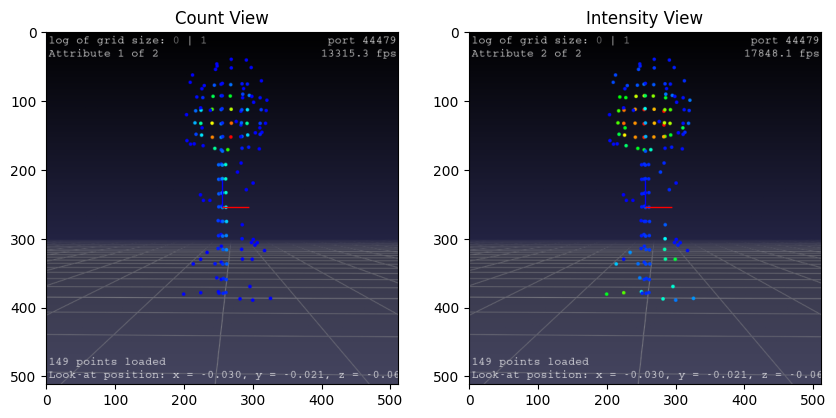

In [12]:
count_view = plt.imread("1.png")
inten_view = plt.imread("2.png")
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(count_view)
axs[0].set_title("Count View")
axs[1].imshow(inten_view)
axs[1].set_title("Intensity View")